### **Importación de librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### **Funciones**

In [2]:
def plotDecorator(ax):
    ax.bar_label(ax.containers[0], fontsize=11)
    for i in ['bottom', 'left']:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(1.5) 
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)

## **Limpieza de datos**

In [3]:
data_2022 = pd.read_csv(ruta_excel_2022,
                  encoding = 'latin-1', sep = ";")
data_2022.head()

,ï»¿DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,62,SIS GRATUITO,909,TeleorientaciÃ³n,20221201,NaN,NaN,0.00,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,61,SIS GRATUITO,56,Consulta externa,20221115,NaN,NaN,5.92,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnÃ³stico (*),20220628,NaN,NaN,222.04,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221111,NaN,NaN,23.45,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221130,NaN,NaN,23.45,20230525


In [4]:
data_2022 = data_2022.rename(columns = {'ï»¿DOCUMENTO_ANONIMIZADO':'DOCUMENTO_ANONIMIZADO'})

In [5]:
data_2023 = pd.read_csv(ruta_excel_2023,
                  encoding = 'latin-1', sep = ";")
data_2023.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,64271,202303,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,...,FEMENINO,45,SIS PARA TODOS,71,Apoyo al diagnóstico,20230217,NaN,NaN,168.95,20231113
1,64278,202302,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,49,SIS GRATUITO,901,Apoyo al Tratamiento,20230130,NaN,NaN,32.12,20231113
2,64281,202306,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C504,...,FEMENINO,47,SIS PARA TODOS,56,Consulta externa,20230527,NaN,NaN,84.62,20231113
3,64283,202303,7397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,40101.0,C61X,...,MASCULINO,64,SIS GRATUITO,56,Consulta externa,20230203,NaN,NaN,22.74,20231113
4,64286,202301,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C910,...,MASCULINO,14,SIS GRATUITO,56,Consulta externa,20230106,NaN,NaN,9.28,20231113


In [6]:
data = pd.concat([data_2022, data_2023], axis = 0)
data.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,62,SIS GRATUITO,909,TeleorientaciÃ³n,20221201,NaN,NaN,0.00,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,61,SIS GRATUITO,56,Consulta externa,20221115,NaN,NaN,5.92,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnÃ³stico (*),20220628,NaN,NaN,222.04,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221111,NaN,NaN,23.45,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221130,NaN,NaN,23.45,20230525


In [7]:
data_2023[data_2023["DOCUMENTO_ANONIMIZADO"] == 5060]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
65628,5060,202301,6218,NAC. DANIEL A. CARRION,REGION CALLAO,Callao,Callao,Bellavista,70102.0,C509,...,FEMENINO,53,SIS GRATUITO,56,Consulta externa,20221104,NaN,NaN,91.320,20231113
66567,5060,202305,6218,NAC. DANIEL A. CARRION,REGION CALLAO,Callao,Callao,Bellavista,70102.0,C509,...,FEMENINO,54,SIS GRATUITO,56,Consulta externa,20230429,NaN,NaN,44.595,20231113
67011,5060,202302,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,75,SIS INDEPENDIENTE,71,Apoyo al diagnóstico,20230116,NaN,NaN,33.640,20231113
67275,5060,202302,6218,NAC. DANIEL A. CARRION,REGION CALLAO,Callao,Callao,Bellavista,70102.0,C509,...,FEMENINO,54,SIS GRATUITO,56,Consulta externa,20230118,NaN,NaN,91.720,20231113
68268,5060,202303,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,75,SIS INDEPENDIENTE,56,Consulta externa,20230228,NaN,NaN,13.270,20231113
68665,5060,202304,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,75,SIS PARA TODOS,56,Consulta externa,20230330,NaN,NaN,2.700,20231113
68666,5060,202305,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,75,SIS PARA TODOS,71,Apoyo al diagnóstico,20230422,NaN,NaN,84.940,20231113


### **Evaluación de Valores Nulos**

In [8]:
data.isnull().sum()

DOCUMENTO_ANONIMIZADO         0
PERIODO                       0
RENAES                        0
IPRESS                      144
REGION                        0
DEPARTAMENTO              16036
PROVINCIA                 16036
DISTRITO                  16036
UBIGEO                    24885
CODIGO_DIAGNOSTICO            0
DIAGNOSTICOS                  0
GRUPO_DIAGNOSTICOS            0
GRUPO_COBERTURA               0
SEXO                          0
EDAD                          0
TIPO_SEGURO                   0
CODIGO_SERVICIO               0
SERVICIO                      0
FECHA_ATENCION                0
FECHA_INTERNAMIENTO      747670
FECHA_ALTA               658789
MONTO_BRUTO                   0
FECHA_CORTE                   0
dtype: int64

In [9]:
# Reemplazar los valores nulos por el string "SIN DATOS"
data["IPRESS"] = data["IPRESS"].fillna("SIN DATOS")
data["DEPARTAMENTO"] = data["DEPARTAMENTO"].fillna("SIN DATOS")
data["PROVINCIA"] = data["PROVINCIA"].fillna("SIN DATOS")
data["DISTRITO"] = data["DISTRITO"].fillna("SIN DATOS")
data["UBIGEO"] = data["UBIGEO"].fillna("SIN DATOS")

In [10]:
data.isnull().sum()

DOCUMENTO_ANONIMIZADO         0
PERIODO                       0
RENAES                        0
IPRESS                        0
REGION                        0
DEPARTAMENTO                  0
PROVINCIA                     0
DISTRITO                      0
UBIGEO                        0
CODIGO_DIAGNOSTICO            0
DIAGNOSTICOS                  0
GRUPO_DIAGNOSTICOS            0
GRUPO_COBERTURA               0
SEXO                          0
EDAD                          0
TIPO_SEGURO                   0
CODIGO_SERVICIO               0
SERVICIO                      0
FECHA_ATENCION                0
FECHA_INTERNAMIENTO      747670
FECHA_ALTA               658789
MONTO_BRUTO                   0
FECHA_CORTE                   0
dtype: int64

In [11]:
data.shape

(820675, 23)

### **Elección de columnas que se utilizarán para el análisis de datos y aplicación del modelo de Machine Learning**

In [12]:
data = data[['DOCUMENTO_ANONIMIZADO', 'PERIODO', 'RENAES', 'IPRESS', 'REGION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO','DIAGNOSTICOS', 'GRUPO_DIAGNOSTICOS', 
             'GRUPO_COBERTURA', 'SEXO', 'EDAD',
       'TIPO_SEGURO', 'CODIGO_SERVICIO', 'SERVICIO', 'FECHA_ATENCION', 'MONTO_BRUTO']]

## **Análisis Exploratorio de Datos**

**1. Top 10 de la cantidad total de atenciones oncológicas realizadas por documento anonimizado** 

In [13]:
question_1 = pd.DataFrame(data.groupby("DOCUMENTO_ANONIMIZADO")["PERIODO"].count()).rename(
columns = {'PERIODO':'CANTIDAD'}).sort_values(ascending = False, by="CANTIDAD")
question_1.iloc[:10]

,CANTIDAD
DOCUMENTO_ANONIMIZADO,
26150,300
29762,260
57354,239
76377,226
8014,220
2671,208
5581,205
89740,202
75950,198


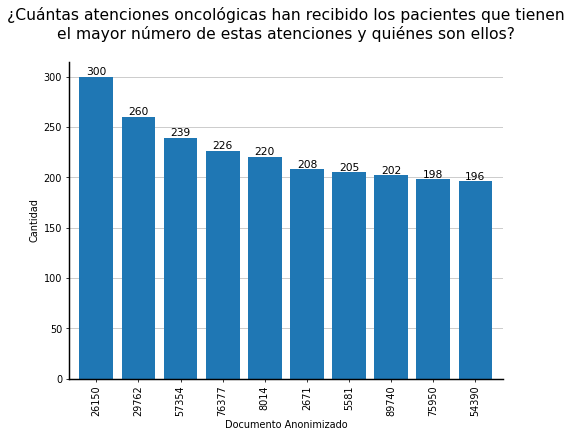

In [14]:
sum_atenciones = sum(question_1["CANTIDAD"])
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
question_1.iloc[:10].plot(kind='bar', ax = ax, width = 0.8)
plotDecorator(ax)
plt.xlabel("Documento Anonimizado")
plt.ylabel("Cantidad")
plt.title("¿Cuántas atenciones oncológicas han recibido los pacientes que tienen\nel mayor número de estas atenciones y quiénes son ellos?\n",
         size = 16)
leg = plt.legend()
leg.remove()
plt.show()

In [15]:
print(f"Entre Ene - Dic 2022 y Ene - Jun 2023, {len(question_1.index)} pacientes tuvieron atenciones de cobertura oncológicas realizadas por FISSAL.")
print(f"Entre Ene - Dic 2022 y Ene - Jun 2023, se han llevado a cabo {sum_atenciones} atenciones oncológicas realizadas por FISSAL.")

Entre Ene - Dic 2022 y Ene - Jun 2023, 40548 pacientes tuvieron atenciones de cobertura oncológicas realizadas por FISSAL.
Entre Ene - Dic 2022 y Ene - Jun 2023, se han llevado a cabo 820675 atenciones oncológicas realizadas por FISSAL.


**2. Cantidad porcentual de atenciones oncológicas del sexo mujer**

In [16]:
question_2 = pd.DataFrame(data[data["SEXO"] == "FEMENINO"].groupby("GRUPO_DIAGNOSTICOS")["DOCUMENTO_ANONIMIZADO"].count())
question_2["DOCUMENTO_ANONIMIZADO"] = question_2["DOCUMENTO_ANONIMIZADO"].apply(lambda x : round(x / (sum(question_2["DOCUMENTO_ANONIMIZADO"]))*100, 2))
question_2

,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE COLON,4.78
CANCER DE CUELLO UTERINO,24.86
CANCER DE ESTOMAGO,4.74
CANCER DE MAMA,49.88
LEUCEMIA,8.56
LINFOMA,7.19


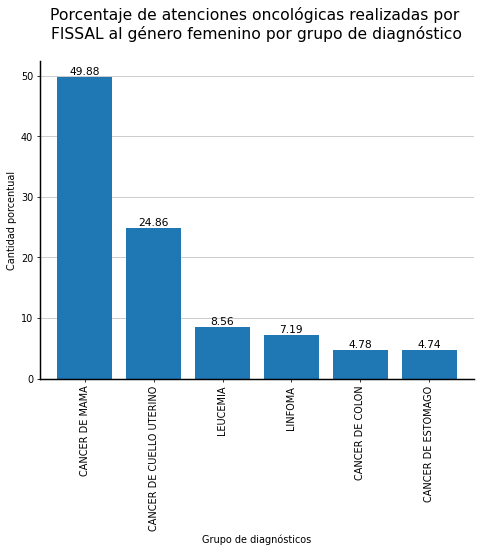

In [17]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
question_2.sort_values(ascending = False, by = "DOCUMENTO_ANONIMIZADO").plot(kind='bar', ax = ax, width = 0.8)
plotDecorator(ax)
plt.xlabel("Grupo de diagnósticos")
plt.ylabel("Cantidad porcentual")
plt.title("Porcentaje de atenciones oncológicas realizadas por \nFISSAL al género femenino por grupo de diagnóstico\n",
         size = 16)
leg = plt.legend()
leg.remove()
plt.show()

**3. Cantidad porcentual de atenciones oncológicas del sexo hombre**

In [18]:
question_3 = pd.DataFrame(data[data["SEXO"] == "MASCULINO"].groupby("GRUPO_DIAGNOSTICOS")["DOCUMENTO_ANONIMIZADO"].count())
question_3["DOCUMENTO_ANONIMIZADO"] = question_3["DOCUMENTO_ANONIMIZADO"].apply(lambda x : round(x / (sum(question_3["DOCUMENTO_ANONIMIZADO"]))*100, 2))
question_3

,DOCUMENTO_ANONIMIZADO
GRUPO_DIAGNOSTICOS,
CANCER DE COLON,10.20
CANCER DE ESTOMAGO,12.08
CANCER DE MAMA,0.81
CANCER DE PROSTATA,32.13
LEUCEMIA,27.28
LINFOMA,17.50


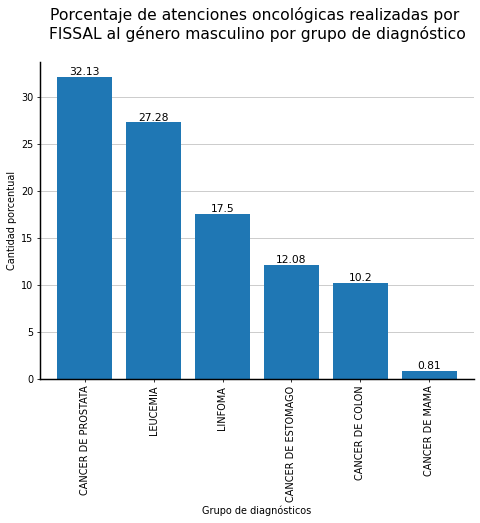

In [19]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
question_3.sort_values(ascending = False, by = "DOCUMENTO_ANONIMIZADO").plot(kind='bar', ax = ax, width = 0.8)
plotDecorator(ax)
plt.xlabel("Grupo de diagnósticos")
plt.ylabel("Cantidad porcentual")
plt.title("Porcentaje de atenciones oncológicas realizadas por \nFISSAL al género masculino por grupo de diagnóstico\n",
         size = 16)
leg = plt.legend()
leg.remove()
plt.show()

### **Aplicación de Machine Learning No Supervisado - Algoritmo de Clustering**

#### **Ambos géneros**

In [20]:
data_v2 = data.groupby("DOCUMENTO_ANONIMIZADO").agg({'EDAD':'mean', 'MONTO_BRUTO':'mean'}).reset_index()
data_kmeans = data_v2[["EDAD", "MONTO_BRUTO"]] 
data_kmeans

,EDAD,MONTO_BRUTO
0,76.000000,70.340000
1,46.590909,63.720455
2,47.000000,28.105000
3,44.000000,612.460000
4,32.000000,392.628000
...,...,...
40543,49.000000,163.500345
40544,31.000000,293.249583
40545,36.000000,40.660000
40546,51.000000,8502.495000


In [23]:
std = StandardScaler()
data_kmeans_transformer = pd.DataFrame(std.fit_transform(data_kmeans))
data_kmeans_transformer.columns = ['EDAD', 'MONTO_BRUTO']
data_kmeans_transformer

,EDAD,MONTO_BRUTO
0,1.254641,-0.096156
1,-0.308338,-0.098540
2,-0.286597,-0.111368
3,-0.446035,0.099093
4,-1.083789,0.019918
...,...,...
40543,-0.180305,-0.062604
40544,-1.136935,-0.015874
40545,-0.871204,-0.106846
40546,-0.074012,2.940753


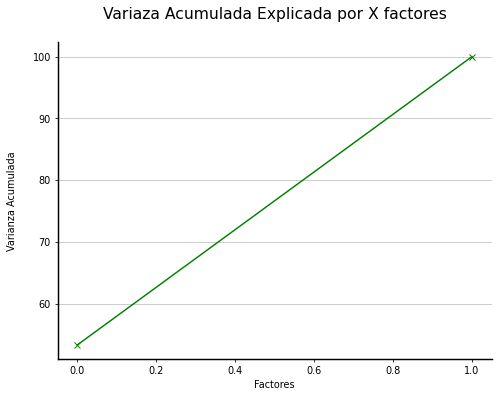

In [25]:
pca = PCA()
pca.fit_transform(data_kmeans_transformer)
data_kmeans_transformer_pca = pca.transform(data_kmeans_transformer)
var = pca.explained_variance_ratio_
var_cum = np.cumsum(np.round(var, decimals = 4)*100)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
ax = plt.gca()
plt.plot(var_cum, 'g-x')
plt.title("Variaza Acumulada Explicada por X factores\n",
         size = 16)
plt.xlabel("Factores")
plt.ylabel("Varianza Acumulada\n")
ax.set_facecolor("white")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [29]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2, 8)
for i in k:
    print(i)
    km = KMeans(n_clusters = i)
    y_predict = km.fit_predict(data_kmeans_transformer_pca)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(data_kmeans_transformer_pca, y_predict))

2
3
4
5
6
7


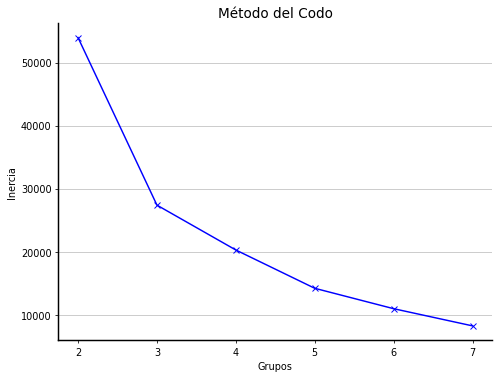

In [30]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
ax = plt.gca()
plt.plot(k, sum_of_squared_distances, "bx-")
plt.xlabel("Grupos")
plt.ylabel("Inercia")
plt.title("Método del Codo", size = 14)
ax.set_facecolor("white")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

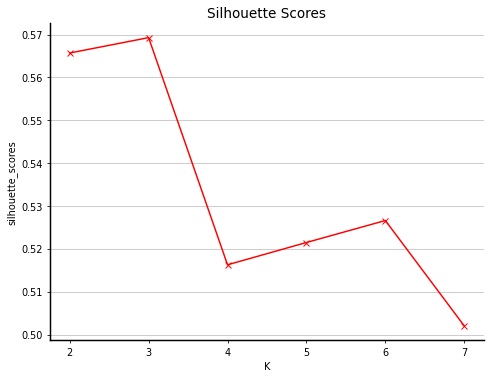

In [31]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.plot(k, silhouette_scores, "rx-")
plt.xlabel("K")
plt.ylabel("silhouette_scores")
plt.title("Silhouette Scores", size = 14)
ax.set_facecolor("white")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [32]:
km = KMeans(n_clusters = 3)
y_predict = km.fit_predict(data_kmeans_transformer_pca)
print(silhouette_score(data_kmeans_transformer_pca, y_predict))
data_v2["KMeans"] = y_predict

0.5692908299891176


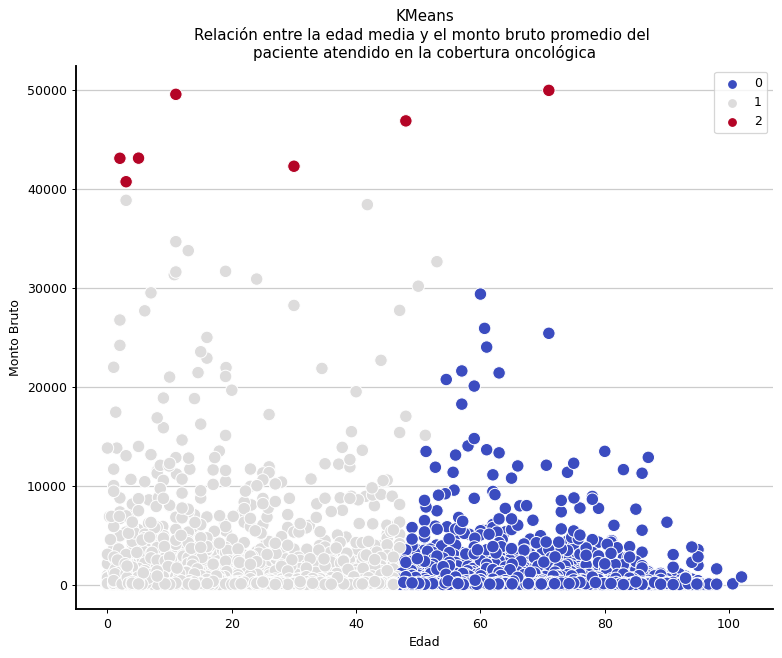

In [47]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = data_v2[data_v2["MONTO_BRUTO"]<=50000], x = "EDAD",
               y = "MONTO_BRUTO", hue = "KMeans", palette = 'coolwarm', s = 100)
ax.set_facecolor("white")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.title("KMeans\nRelación entre la edad media y el monto bruto promedio del \npaciente atendido en la cobertura oncológica")
plt.xlabel("Edad")
plt.ylabel("Monto Bruto")
leyenda = plt.legend()
plt.show()